# Lab 01

## 1. Julia

[Julia](https://julialang.org) is a relatively new programming language designed for scientific computing in mind. It is a dynamic programming language as convenient as Python and R, but also provides high performance and extensibility as C/C++ and Fortran. Check the [chart here](https://www.tiobe.com/tiobe-index/) to see where Julia stands as a programming language among other languages today; its position has been rising fast. 

In this lab, we will cover only the very basics of Julia langauge to get us started for using `Cropbox`: a modeling framework written in Julia. Students in this class can benefit from learning more about Julia language from free external sources. Here are two free tutorials available from [Julia Academy](https://juliaacademy.com/):

- [Julia Programming for Nervous Beginners](https://juliaacademy.com/p/julia-programming-for-nervous-beginners): If you have little to no programming background, taking this free onlne course is highly recommended. It introduces you to computer programming through Julia. It's designed as a 4-week long course but you may comfortably complete the course in one or two weeks.
- [Introduction to Julia (for programmers)](https://juliaacademy.com/p/intro-to-julia): If you are an experienced programmer in other langauges (e.g., Python, R, Java) but new to Julia, this could be a useful course to start learning Julia. 


### Expression

Variable `a` is defined with a value `1`.

In [1]:
a = 1

1

Here is a simple expression working with the variable `a`.

In [2]:
a + 1

2

### Function

Function can be defined by `function` block.

In [3]:
function f(x)
    return 2*x
end

f (generic function with 1 method)

Alternatively, a simple syntax can be also used.

In [4]:
f(x) = 2x

f (generic function with 1 method)

Here we call function `f(x)` with a single argument `2` mapped to `x`.

In [5]:
f(2)

4

There are two types of function arguments: positional and keyword.

In [6]:
g(x, y; a, b) = (x + 2y) * (3a + 4b)

g (generic function with 1 method)

Here, function `g()` has positional arguments `x`, `y` and keyword arguments `a` and `b`. Values of positional arguments are mapped by their positions whereas mapping of keyword arguments are determined by the name of keywords in front of the value.

In [7]:
g(1, 2; a = 3, b = 4)

125

Keyword arguments are placed after `;` and the order of between keyword arguments are not important.

In [8]:
g(1, 2; b = 4, a = 3)

125

In some cases, `,` can be used instead of `;`, but it'd be recommended to keep using `;` for clarity.

In [9]:
g(1, 2, a = 3, b = 4)

125

For example, automatic binding of existing variables as keyword arguments is only allowed when `;` is used.

In [10]:
a = 3
b = 4
g(1, 2; a, b)

125

### Data Types

Julia supports many built-in types which are going to be building blocks for our own data structure.

#### Integers

`Int` is an alias for the default type of signed integer depending on the system (*i.e.* `Int64` for 64-bit).

In [11]:
Int

Int64

In [12]:
vi = 1

1

In [13]:
typeof(vi)

Int64

#### Floating-point Numbers

On 64-bit systems, `Float64` is the default type for floating numbers. Note that there is no alias `Float`.

In [14]:
vf = 1.0

1.0

In [15]:
typeof(vf)

Float64

#### String

String is a colletion of multiple characters. Use double quotes (`""`) to construct a string.

In [16]:
vs = "abc"

"abc"

In [17]:
typeof(vs)

String

#### Symbol

Symbol is often called an interned string. It can contain multiple characters like `string`, but only one copy of the string is stored internally. It is useful to indicate some pre-defined names such as names of variables. We'll see some examples in the tutorial later.

In [18]:
vk = :abc

:abc

In [19]:
typeof(vk)

Symbol

#### Tuple

Tuple is a collection of arbitrary number of elements with any types. Note that positional arguments of functions are internally based on tuples.

In [20]:
vt = (1, 2)

(1, 2)

In [21]:
typeof(vt)

Tuple{Int64, Int64}

#### Named Tuple

Named tuples are like tuples, but their components have associated names. Keyword arguments of functions are based on named tuples.

In [22]:
vn = (a = 1, b = 2)

(a = 1, b = 2)

In [23]:
typeof(vn)

NamedTuple{(:a, :b), Tuple{Int64, Int64}}

#### Composite Type

Composite type, often called struct or object in other languages, is a collection of multiple fields.

In [24]:
struct MyType
    a
    b
end

By default, a composite type can be constructed by calling the type name as a function with field values as arguments.

In [25]:
m = MyType(1, 2)

MyType(1, 2)

Individual fields can be accessed by using a property accessor (`.`).

In [26]:
m.a

1

In [27]:
m.b

2

### Data Structures

There are many useful data structures provided by standard Julia library which are used extensively in Cropbox modeling framework.

#### Pair

`Pair` is a collection of two elements, key and value, stored in a composite type. A nice syntax using `=>` is often used for constructing a pair object.

In [28]:
vp = :a => 1

:a => 1

In [29]:
Pair(:a, 1)

:a => 1

In [30]:
typeof(vp)

Pair{Symbol, Int64}

#### Vector

`Vector` is 1-dimensional `Array` which is a collection of multiple elements with the same type. A nice syntax using brackets (`[..]`) is often used for constructing a vector object.

In [31]:
vv = [1, 2, 3]

3-element Vector{Int64}:
 1
 2
 3

In [32]:
typeof(vv)

Vector{Int64} (alias for Array{Int64, 1})

The type of vector elements may be explicitly given.

In [33]:
vvf = Float64[1, 2, 3]

3-element Vector{Float64}:
 1.0
 2.0
 3.0

In [34]:
typeof(vvf)

Vector{Float64} (alias for Array{Float64, 1})

### Macros

Macros are functions generating code. For example, `@show` macro returns an expression to print out the content of variable.

In [35]:
@show a

a = 3


3

We can take a look at the expression generated by this macro.

In [36]:
@macroexpand @show a

quote
    Base.println("a = ", Base.repr(begin
                #= show.jl:1128 =#
                local var"#96#value" = a
            end))
    var"#96#value"
end

What `@show a` generates in this case is basically close to the code below.

In [37]:
println("a = ", repr(a))
a

a = 3


3

Such an ability to generate code on the fly is what drives our modeling framework which we'll use throughout this course.

## 2. Cropbox

[Cropbox](https://github.com/tomyun/Cropbox.jl) is a modeling framework we're building in our research group to support development of crop models.

### Model Specification

We now start using Cropbox framework to make a very simple exponential growth model adapted from an example introduced in the manual of [Fortran Simulation Translator](https://library.wur.nl/WebQuery/wurpubs/302463) which used to be an underlying framework for many early crop models.

In [38]:
using Cropbox

In [39]:
Cropbox.Interact.WebIO.setup(:ijulia)

WebIO._IJuliaInit()

Here is the original equation of the model. Initial value of $x$ is 1.

$$\frac{dx}{dt} = ax$$

In [40]:
@system S(Controller) begin
    i       => 1   ~ preserve
    a       => 0.1 ~ preserve(parameter)
    r(a, x) => a*x ~ track
    x(r)           ~ accumulate(init = i)
end

S

Here we declared four variables.
- `i`: variable containing initial value of `x` which never changes (*preserved*)
- `a`: variable containing constant **parameter** of exponential growth
- `r`: rate variable which needs to be calculated or *tracked* every time step
- `x`: state variable which *accumulates* by rate `r` over time with initial value `i`

We can visualize dependency graph between variables defined in our system `S` by using some internal functions provided by the framework.

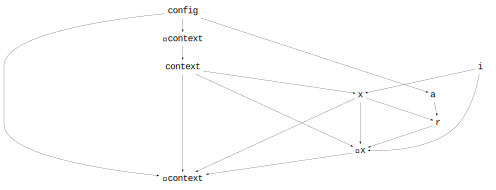

In [41]:
Cropbox.dependency(S)

For example, it's clear to see `r` depends on two variables `x` and `a`. There are some auxiliary nodes (prefixed with $\circ$/$\star$) and implicit variables (*i.e.* `config`, `context`) not declared in our model specification and we will discuss them later.

### Model Simulation

Let's run the model for simulation. While you can directly instantiate your model by calling `instance(S)`, here we  will use a helper function `simulate()` for simplicity. It will internally instantiate the model, update it for a given number of iterations and return the result packed in a `DataFrame`. By default, columns will include `tick` variable from internal `Clock` and all state variables defined in the target system.

In [42]:
r = simulate(S, stop = 10)

Row,time,i,a,r,x
,Quantity…,Float64,Float64,Float64,Float64
1,0.0 hr,1.0,0.1,0.1,1.0
2,1.0 hr,1.0,0.1,0.11,1.1
3,2.0 hr,1.0,0.1,0.121,1.21
4,3.0 hr,1.0,0.1,0.1331,1.331
5,4.0 hr,1.0,0.1,0.14641,1.4641
6,5.0 hr,1.0,0.1,0.161051,1.61051
7,6.0 hr,1.0,0.1,0.177156,1.77156
8,7.0 hr,1.0,0.1,0.194872,1.94872
9,8.0 hr,1.0,0.1,0.214359,2.14359


Note that `tick` is in hourly units (`hr`) by default.

#### Plotting

As the result is backed by [DataFrames.jl](https://github.com/JuliaData/DataFrames.jl), we can easily hand it off to other Julia packages for further analysis. Cropbox framework also provides a handy `plot()` function for simple visualization.

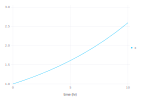

In [43]:
# plot(r, :time, :x, kind=:line)
visualize(r, :time, :x, kind=:line)

#### Configuration

Note that the rate of growth `a` is a *parameter* in our model. In modeling, we often need to change the value of a parameter for different systems or species. We can change its value before running the model. Let's try smaller value of 0.05 instead of default 0.1.

In [44]:
c = :S => :a => 0.05

:S => (:a => 0.05)

In [45]:
@config(c)

a,=,0.05


The initial values of variables (mostly `preserve` kind in practice) tagged as `parameter` can be set in a dictionary-like structure supplied to `simulate()` or `instance()` by keyword argument named `config`.

In [46]:
r2 = simulate(S, config = c, stop = 10);

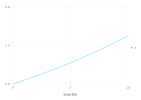

In [47]:
plot(r2, :time, :x, kind = :line)

Now we can confirm that the exponential growth became much slower than the previous simulation by using a smaller rate parameter.

### Model Internals

When we specify our model with `@system` macro, Cropbox automatically generates some code behind the scene for handling model setup and update. With our exponential growth model, it would mean we get `struct` named `S` and `update!(::S, ..)` for example. We can take a look at the actual code generatd during this process by using [`@macroexpand`](https://docs.julialang.org/en/v1/base/base/#Base.macroexpand).

In [48]:
@macroexpand @system S(Controller) begin
    i       => 1   ~ preserve
    a       => 0.1 ~ preserve(parameter)
    r(a, x) => a*x ~ track
    x(r)           ~ accumulate(init = i)
end

quote
    #= /opt/julia/packages/Cropbox/YDUc0/src/macro.jl:460 =#
    begin
        $(Expr(:meta, :doc))
        abstract type S <: System end
    end
    #= /opt/julia/packages/Cropbox/YDUc0/src/macro.jl:461 =#
    S(; var"#230#kw"...) = begin
            #= /opt/julia/packages/Cropbox/YDUc0/src/macro.jl:461 =#
            var"##_S#310"(; var"#230#kw"...)
        end
    #= /opt/julia/packages/Cropbox/YDUc0/src/macro.jl:462 =#
    (Cropbox.Cropbox).typefor(::Cropbox.Type{<:S}) = begin
            #= /opt/julia/packages/Cropbox/YDUc0/src/macro.jl:462 =#
            var"##_S#310"
        end
    #= /opt/julia/packages/Cropbox/YDUc0/src/macro.jl:463 =#
    let var"#228###CS#313" = Cropbox.merge(Cropbox.constsof.(Cropbox._mixincollect(Cropbox.mixinsof(Main, [:System, :Controller])))..., Cropbox.Dict(:__Context__ => Cropbox.typefor(Cropbox.Context))), var"#229#__Context__" = var"#228###CS#313"[:__Context__], var"#229#__Context__" = var"#228###CS#313"[:__Context__]
        #= /opt/julia/pa

#### Syntax

`@system` macro accepts lines of variable declaration specified by its own syntax. They are loosely based on Julia syntax sharing common expressions and operators, but have distinct semantics explained as below. In other words, they form a domain-specific language (DSL) specifically designed for our crop modeling framework.

`name[(args..; kwargs..)][: alias] [=> body] ~ [state][::type][(tags..)]`

- `name`: variable name (usually short abbreviation)
- `args`: automatically bound depending variables
- `kwargs`: custom bound depending variables (only for *call* now)
- `alias`: alternative name (long description)
- `body`: code snippet (state/type specific, `begin .. end` block for multiple lines)
- `state`: verb indicating kind of state (empty if not `State`-based)
- `type`: internal type (*i.e.* `Float64` by default for most `State` variable)
- `tags`: variable specific options (*i.e.* unit, min/max, etc.)

Here is a hypothetical model specification showing various uses of syntax elements.

In [49]:
@system MySystem begin
    a: my_precious_variable => 1 ~ preserve::Int(extern)
    b(a) => begin
        2a
    end ~ track
    c ~ ::String(override)
    f(b; x, y) => b*(x+y) ~ call
    g(f) => f(1, 2) ~ track
end

MySystem

By the way, although looking verbose and suspicious, `MySystem` is still on a valid specification and you can visualizae its dependency graph of state variables without any problem.

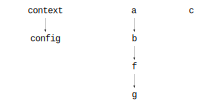

In [50]:
Cropbox.dependency(MySystem)

#### State

There are a number of built-in `State` verbs that can be used in model specification.

- `hold`: mark a placeholder for variable shared between mixins
- `wrap`: pass a state variable to other fucnction as is, not just its value
- `advance`: hold a time variable defining time steps (*i.e.* tick)
- `preserve`: keep the initial value once assigned (*i.e.* constants, parameters)
- `tabulate`: make two dimensional table with named keys (*i.e.* partitioning table referenced by stage and organ)
- `interpolate`: make curve fuction interpolated with discrete key/value pairs (*i.e.* soil characteristic curve)
- `track`: recalculate its value every time step
- `drive`: fetch a value from other variable by using itself a key
- `call`: define a partial function bound with some variables
- `integrate`: calculate integral using Gaussian method
- `accumulate`: integrate rate calcuation every time step
- `capture`: calculate difference between integration for each time step
- `flag`: set a boolean flag used by other variables in the next time step
- `produce`: allow dynamic creation of a new system (*i.e.* root structure development)
- `bisect`: solve nonlinear equation using bisection method (*i.e.* photosynthesis model coupling)
- `solve`: symbolic polynomial equation solver (*i.e.* quadratic equations in photosynthesis model)

Internally, each kind directly maps to a Julia `struct` with its name capitalized. For example, `track` kind maps to `Track` struct.

#### System

`System` is a container that contains a number of *variables*. Once defined, its structure gets fixed that no additional variables can get added or removed, but the state of variables can be still updated throughout time steps.

`System` may include other `System` as its component. In such case, kind of `state` would be empty and type of included `System` should be defined in the variable declaration. Indeed, every `System` by default includes a `System` called `Context` referred by `context` variable. We can visualize hierarchy of systems with `plot()` and `Cropbox.hierarchy()`.

For example, we can visually confirm that `MySystem` *has* a `Context` which *has* a `Clock`.

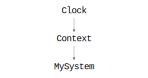

In [51]:
Cropbox.hierarchy(MySystem)

In order to get a model that can be run, we need to make an instance of `System`. It can be done by calling `instance()` function on the type of `System`.

In [52]:
s = instance(S)

context,,=,<Context>
config,,=,<Config>
i,,=,1.0
a,,=,0.1
r,,=,0.1
x,,=,1.0


Here, we just made an instance of `S` which is referred by a variable name `s`.

#### Simulation

Now we can call `simulate!()` to update its internal states for one time step.

In [53]:
simulate!(s)

Row,time,i,a,r,x
,Quantity…,Float64,Float64,Float64,Float64
1,0.0 hr,1.0,0.1,0.1,1.0


If you want to run for more than one time step, the number of iterations can be specfied.

In [54]:
simulate!(s, stop = 2)

Row,time,i,a,r,x
,Quantity…,Float64,Float64,Float64,Float64
1,0.0 hr,1.0,0.1,0.1,1.0
2,1.0 hr,1.0,0.1,0.11,1.1
3,2.0 hr,1.0,0.1,0.121,1.21


Instead of calling `simulate!()` after `instance()`, `simulate()` can do both at the same time. Note that `simulate()` works with the type of `System` whereas `simulate!()` works with an instance of such `System`. Note that Julia follows a convention that function ending with `!` can change or mutate any arguments supplied to the function.

In [55]:
simulate(S, stop = 3)

Row,time,i,a,r,x
,Quantity…,Float64,Float64,Float64,Float64
1,0.0 hr,1.0,0.1,0.1,1.0
2,1.0 hr,1.0,0.1,0.11,1.1
3,2.0 hr,1.0,0.1,0.121,1.21
4,3.0 hr,1.0,0.1,0.1331,1.331


#### Navigation

Cropbox provides `dive()` function which is a simple interactive tool for inspecting internal states of `System`. Unfortunately, it [doesn't work](https://github.com/JuliaLang/IJulia.jl/issues/801) inside Jupyter Notebook, merely showing some values with no navigation allowed. It should be still very handy on terminal REPL environment where you can freely navigate in and out of the variables.

In [56]:
dive(s)

[doc]

[system]
S
  context = <Context>
  config = <Config>
  i = 1.0
  a = 0.1
  r = 0.121
  x = 1.21

#### Controller

At this point, you may want to run this model as we did before with `simulate()`, but it would turn out our `MySystem` can't be run as a standalone model. Due to some technical implications regarding performance, any `System` that wants to be a direct target of instantiation requires to include `Controller` mixin in its specification. Remember we had `@system S(Controller) ..`, not just `@system S ..` in our first example.

#### Mixin

[Mixin](https://en.wikipedia.org/wiki/Mixin) is a piece of `System` specification that can be included in the specification of larger `System`. Each mixin implements an own set of variables and some of them may be linked with variables from other `System` when a new `System` is formed. Mixins are declared by giving a list of them enclosed within parentheses after the name of `System` in the specification.

Here is an example of mixin where `S3` is composed by including `S1` and `S2` as mixins.

In [57]:
@system S1 begin
    a => 1 ~ preserve
    b(a) => 2a ~ track
end

S1

In [58]:
@system S2 begin
    a => 2 ~ preserve
    b(a, c) => a*c ~ track
    c => 1 ~ preserve
end

S2

In [59]:
@system S3(S1, S2) begin
    d(a) => 3a ~ preserve
end

S3

We can take a look at the actual specification of `S3` after mixins were included by calling `Cropbox.source()`.

In [60]:
Cropbox.source(S3)

quote
    #= In[59]:2 =#
    d(a) => 3a ~ preserve
end

Note that `a` from `S1` with default value of 1 was overridden by `S2` where default value was 2. The same went for variable `b`. In other words, order of mixins are important.

It may help understanding mixins by visualizaing their structure.

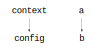

In [61]:
Cropbox.dependency(S1)

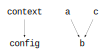

In [62]:
Cropbox.dependency(S2)

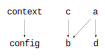

In [63]:
Cropbox.dependency(S3)

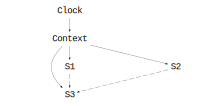

In [64]:
Cropbox.hierarchy(S3)

Here `S3` *includes* `S1` and `S2`. `S3` *has* a `Context` which has a `Clock`.

### Notes

1. Some functions (*i.e.* `simulate()`, `instance()`) we used in this notebook were called without explicit prefix of package name (`Cropbox.`), while some other functions were the opposite (*i.e.* `Cropbox.plot()`, `Cropbox.hierarchy()`, `Cropbox.source()`). The latter group of functions are not exported by default because they were likely designed for internal use only and are more likely to change their shapes/behaviors throughout the future development. So please be mindful when you happen to use them.

2. This tutorial assumed readers have basic understanding of Julia language. For more information, please read the official [Julia documentation](https://docs.julialang.org/).

## 3. Examples

### 3.1. Maize Yield Model

- Eq 1.1

$$
Y = 1143 + 31.7N - 0.084N^2
$$

- Table

| Symbol | Value | Units | Description |
| :- | :- | :- | :- |
| $N$ | - | $\mathrm{kg}$ $\mathrm{ha^{-1}}$ | Nitrogen fertilizer rate |
| $Y$ | - | $\mathrm{kg}$ $\mathrm{ha^{-1}}$ | Maize yield |

In [65]:
@system MY(Controller) begin
    N                               ~ preserve(parameter)
    Y(N) => 1143 + 31.7N - 0.084N^2 ~ track
end

MY

In [66]:
c = @config MY => :N => 100

N,=,100


In [67]:
simulate(MY; config = c)

Row,time,N,Y
,Quantity…,Float64,Float64
1,0.0 hr,100.0,3473.0


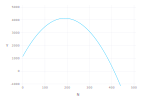

In [68]:
visualize(MY, :N, :Y;
    xstep = MY => :N => 0:10:500,
    kind = :line,
    ylim = (-1000, 5000),
)

- 단위를 명시할 때는 변수에 nonunit을 붙여야함
- 위 예제의 경우 N^2에서 단위도 같이 제곱되기에 그냥 단위만 설정한다면, 단위가 맞지 않아 차원 에러가 발생함
- 단위를 명시하는 방법은 아래와 같음: 매개변수를 함수에 넣을 때 단위를 자동으로 변환해서 계산해 주는 장점을 가짐

In [69]:
@system MY(Controller) begin
    N                               ~ preserve(parameter, u"kg/ha")
    Y(nonunit(N)) => 1143 + 31.7N - 0.084N^2 ~ track(u"kg/ha")
end

MY

In [70]:
c = @config MY => :N => 1u"g/cm^2"

N,=,100000 kg ha^-1


### 3.2. Leaf Count Model

#### 3.2.1. Branch Approach

- Eq 1.2.

$$
N = n_l \cdot n_b
$$

- Table

| Symbol | Value | Units | Description |
| :- | :- | :- | :- |
| $N$ | - | - | Total number of leaves in the tree |
| $n_l$ | 153 | - | Average number of leaves in a branch |
| $n_b$ | 99 | - | Number of branches in the tree |

In [71]:
@system LC1(Controller) begin
    N(nl, nb) => nl * nb ~ track
    nl        => 153     ~ preserve(parameter)
    nb        => 99      ~ preserve(parameter)
end

LC1

In [72]:
simulate(LC1)

Row,time,N,nl,nb
,Quantity…,Float64,Float64,Float64
1,0.0 hr,15147.0,153.0,99.0


In [73]:
manipulate(c -> simulate(LC1; config = c).N[];
    parameters = LC1 => (
        :nl => 0:200,
        :nb => 0:200,
    ),
)

WebIO.Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[WebIO.Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any["LC1"], Dict{Symbol, Any}(:style => Dict{String, Any}("color" => :rebeccapurple, "font-family" => "monospace"))), WebIO.Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[WebIO.Scope(WebIO.Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[WebIO.Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[WebIO.Node{WebIO.DOM}(WebIO.DOM(:html, :label), Any["nl"], Dict{Symbol, Any}(:className => "interact ", :style => Dict{Any, Any}(:padding => "5px 10px 0px 10px", "white-space" => :nowrap, "color" => :royalblue)))], Dict{Symbol, Any}(:className => "interact-flex-row-left")), WebIO.Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[WebIO.Node{WebIO.DOM}(WebIO.DOM(:html, :input), Any[], Dict{Symbol, Any}(:max => 200, :min => 0, :attributes => Dict{Any, Any}(:type => "range", Symbol("data-bind") => "numericValue: index, valueUpdate: 'input', event: {change: function (){this.changes(this.changes()+1)}}", "orient" => "horizontal"), :step => 1, :className => "slider slider is-fullwidth", :style => Dict{Any, Any}()))], Dict{Symbol, Any}(:className => "interact-flex-row-center")), WebIO.Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[WebIO.Node{WebIO.DOM}(WebIO.DOM(:html, :p), Any[], Dict{Symbol, Any}(:attributes => Dict("data-bind" => "text: formatted_val")))], Dict{Symbol, Any}(:className => "interact-flex-row-right"))], Dict{Symbol, Any}(:className => "interact-flex-row interact-widget", :style => Dict("font-family" => "monospace", "width" => "80%"))), Dict{String, Tuple{Observables.AbstractObservable, Union{Nothing, Bool}}}("changes" => (Observable(0), nothing), "index" => (Observable(100), nothing)), Set{String}(), nothing, WebIO.Asset[WebIO.Asset("js", "knockout", "/opt/julia/packages/Knockout/HReiN/src/../assets/knockout.js"), WebIO.Asset("js", "knockout_punches", "/opt/julia/packages/Knockout/HReiN/src/../assets/knockout_punches.js"), WebIO.Asset("js", nothing, "/opt/julia/packages/InteractBase/LJXv3/src/../assets/all.js"), WebIO.Asset("css", nothing, "/opt/julia/packages/InteractBase/LJXv3/src/../assets/style.css"), WebIO.Asset("css", nothing, "/opt/julia/packages/Interact/PENUy/src/../assets/bulma_confined.min.css")], Dict{Any, Any}("changes" => Any[WebIO.JSString("(function (val){return (val!=this.model[\"changes\"]()) ? (this.valueFromJulia[\"changes\"]=true, this.model[\"changes\"](val)) : undefined})")], "index" => Any[WebIO.JSString("(function (val){return (val!=this.model[\"index\"]()) ? (this.valueFromJulia[\"index\"]=true, this.model[\"index\"](val)) : undefined})")]), WebIO.ConnectionPool(Channel{Any}(32), Set{WebIO.AbstractConnection}(), Base.GenericCondition{ReentrantLock}(Base.IntrusiveLinkedList{Task}(Task (runnable) @0x0000ffff7c2c6ca0, Task (runnable) @0x0000ffff7c2c6ca0), ReentrantLock(nothing, 0x00000000, 0x00, Base.GenericCondition{Base.Threads.SpinLock}(Base.IntrusiveLinkedList{Task}(nothing, nothing), Base.Threads.SpinLock(0)), (0, 0, 280517199003648)))), WebIO.JSString[WebIO.JSString("function () {\n    var handler = (function (ko, koPunches) {\n    ko.punches.enableAll();\n    ko.bindingHandlers.numericValue = {\n        init: function(element, valueAccessor, allBindings, data, context) {\n            var stringified = ko.observable(ko.unwrap(valueAccessor()));\n            stringified.subscribe(function(value) {\n                var val = parseFloat(value);\n                if (!isNaN(val)) {\n                    valueAccessor()(val);\n                }\n            });\n            valueAccessor().subscribe(function(value) {\n                var str = JSON.stringify(value);\n                if ((str == \"0\") && ([\"-0\", \"-0.\"].indexOf(stringified()) >= 0))\n                     return;\n                 if ([\"null\", \"\"].indexOf(str) >= 0)\n                     return;\n                stringified(str);\n            });\n            ko.applyBindingsToNode(\n                element,\n                {\n                    value: stringifi

#### 3.2.2. Ellipsoid Approach

- Eq 1.4.-1.6.

$$
\begin{align}
N &= \frac{V_c}{V_l} \\
V_c &= \frac{\pi}{6}HWL \\
V_l &= \frac{\pi}{6}l^3
\end{align}
$$

- Table

| Symbol | Value | Units | Description |
| :- | :- | :- | :- |
| $N$ | - | - | Total number of leaves in the tree |
| $V_c$ | - | $\mathrm{m^3}$ | Volume of the canopy |
| $V_l$ | - | $\mathrm{m^3}$ | Volumne of a single leaf |
| $H$ | 3.5 | $\mathrm{m}$ | Height of the canopy |
| $W$ | 2.5 | $\mathrm{m}$ | Width of the canopy |
| $L$ | 2.5 | $\mathrm{m}$ | Length of the canopy |
| $l$ | 0.14 | $\mathrm{m}$ | Average length of a single leaf |

In [74]:
@system LC2(Controller) begin
    N(Vc, Vl)   => Vc / Vl          ~ track
    
    Vc(H, W, L) => π/6 * H * W * L  ~ track(u"m^3") # π = \pi
    Vl(l)       => π/6 * l^3        ~ track(u"m^3")
    
    H => 3.5  ~ preserve(parameter, u"m")
    W => 2.5  ~ preserve(parameter, u"m")
    L => 2.5  ~ preserve(parameter, u"m")
    l => 0.14 ~ preserve(parameter, u"m")
end

LC2

In [75]:
simulate(LC2)

Row,time,N,Vc,Vl,H,W,L,l
,Quantity…,Float64,Quantity…,Quantity…,Quantity…,Quantity…,Quantity…,Quantity…
1,0.0 hr,7971.94,11.4537 m^3,0.00143676 m^3,3.5 m,2.5 m,2.5 m,0.14 m


In [76]:
manipulate(c -> simulate(LC2; config = c).N[];
    parameters = LC2 => (
        :H => 0:0.1:5,
        :W => 0:0.1:5,
        :L => 0:0.1:5,
        :l => 0:0.01:1,
    ),
)

WebIO.Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[WebIO.Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any["LC2"], Dict{Symbol, Any}(:style => Dict{String, Any}("color" => :rebeccapurple, "font-family" => "monospace"))), WebIO.Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[WebIO.Scope(WebIO.Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[WebIO.Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[WebIO.Node{WebIO.DOM}(WebIO.DOM(:html, :label), Any["H (m)"], Dict{Symbol, Any}(:className => "interact ", :style => Dict{Any, Any}(:padding => "5px 10px 0px 10px", "white-space" => :nowrap, "color" => :royalblue)))], Dict{Symbol, Any}(:className => "interact-flex-row-left")), WebIO.Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[WebIO.Node{WebIO.DOM}(WebIO.DOM(:html, :input), Any[], Dict{Symbol, Any}(:max => 51, :min => 1, :attributes => Dict{Any, Any}(:type => "range", Symbol("data-bind") => "numericValue: index, valueUpdate: 'input', event: {change: function (){this.changes(this.changes()+1)}}", "orient" => "horizontal"), :step => 1, :className => "slider slider is-fullwidth", :style => Dict{Any, Any}()))], Dict{Symbol, Any}(:className => "interact-flex-row-center")), WebIO.Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[WebIO.Node{WebIO.DOM}(WebIO.DOM(:html, :p), Any[], Dict{Symbol, Any}(:attributes => Dict("data-bind" => "text: formatted_val")))], Dict{Symbol, Any}(:className => "interact-flex-row-right"))], Dict{Symbol, Any}(:className => "interact-flex-row interact-widget", :style => Dict("font-family" => "monospace", "width" => "80%"))), Dict{String, Tuple{Observables.AbstractObservable, Union{Nothing, Bool}}}("changes" => (Observable(0), nothing), "index" => (Observable{Any}(26), nothing)), Set{String}(), nothing, WebIO.Asset[WebIO.Asset("js", "knockout", "/opt/julia/packages/Knockout/HReiN/src/../assets/knockout.js"), WebIO.Asset("js", "knockout_punches", "/opt/julia/packages/Knockout/HReiN/src/../assets/knockout_punches.js"), WebIO.Asset("js", nothing, "/opt/julia/packages/InteractBase/LJXv3/src/../assets/all.js"), WebIO.Asset("css", nothing, "/opt/julia/packages/InteractBase/LJXv3/src/../assets/style.css"), WebIO.Asset("css", nothing, "/opt/julia/packages/Interact/PENUy/src/../assets/bulma_confined.min.css")], Dict{Any, Any}("changes" => Any[WebIO.JSString("(function (val){return (val!=this.model[\"changes\"]()) ? (this.valueFromJulia[\"changes\"]=true, this.model[\"changes\"](val)) : undefined})")], "index" => Any[WebIO.JSString("(function (val){return (val!=this.model[\"index\"]()) ? (this.valueFromJulia[\"index\"]=true, this.model[\"index\"](val)) : undefined})")]), WebIO.ConnectionPool(Channel{Any}(32), Set{WebIO.AbstractConnection}(), Base.GenericCondition{ReentrantLock}(Base.IntrusiveLinkedList{Task}(Task (runnable) @0x0000ffff7d63a2f0, Task (runnable) @0x0000ffff7d63a2f0), ReentrantLock(nothing, 0x00000000, 0x00, Base.GenericCondition{Base.Threads.SpinLock}(Base.IntrusiveLinkedList{Task}(nothing, nothing), Base.Threads.SpinLock(0)), (8, 281472236971440, 0)))), WebIO.JSString[WebIO.JSString("function () {\n    var handler = (function (ko, koPunches) {\n    ko.punches.enableAll();\n    ko.bindingHandlers.numericValue = {\n        init: function(element, valueAccessor, allBindings, data, context) {\n            var stringified = ko.observable(ko.unwrap(valueAccessor()));\n            stringified.subscribe(function(value) {\n                var val = parseFloat(value);\n                if (!isNaN(val)) {\n                    valueAccessor()(val);\n                }\n            });\n            valueAccessor().subscribe(function(value) {\n                var str = JSON.stringify(value);\n                if ((str == \"0\") && ([\"-0\", \"-0.\"].indexOf(stringified()) >= 0))\n                     return;\n                 if ([\"null\", \"\"].indexOf(str) >= 0)\n                     return;\n                stringified(str);\n            });\n            ko.applyBindingsToNode(\n                element,\n                {\n                    value: str

#### 3.2.3. Two Ellipsoids Approach

- Eq 1.8.-1.10.

$$
\begin{align}
N &= \frac{V_o}{V_l} \\
V_o &= \frac{\pi}{6}HWL(1 - f_H f_W f_l) \\
V_l &= \frac{1}{\rho_l} \cdot \frac{\pi}{6}l^3
\end{align}
$$

- Table

| Symbol | Value | Units | Description |
| :- | :- | :- | :- |
| $N$ | - | - | Total number of leaves in the tree |
| $V_c$ | - | $\mathrm{m^3}$ | Volume of the canopy |
| $V_l$ | - | $\mathrm{m^3}$ | Volumne of a single leaf |
| $H$ | 3.5 | $\mathrm{m}$ | Height of the canopy |
| $W$ | 2.5 | $\mathrm{m}$ | Width of the canopy |
| $L$ | 2.5 | $\mathrm{m}$ | Length of the canopy |
| $f_H$ | 0.5 | - | Fraction of the canopy height |
| $f_W$ | 0.5 | - | Fraction of the canopy width |
| $f_L$ | 0.5 | - | Fraction of the canopy length |
| $l$ | 0.14 | $\mathrm{m}$ | Average length of a single leaf |
| $\rho_l$ | 2 | - | leaf density coefficient |


In [77]:
@system LC3(Controller) begin
    N(Vo, Vl)   => Vo / Vl          ~ track
    
    Vo(H, W, L, fH, fW, fL) => begin
        π/6 * H * W * L * (1 - fH * fW * fL)
    end ~ track(u"m^3")
    
    Vl(ρl, l) => begin
        1/ρl * π/6 * l^3
    end ~ track(u"m^3")
    
    H => 3.5  ~ preserve(parameter, u"m")
    W => 2.5  ~ preserve(parameter, u"m")
    L => 2.5  ~ preserve(parameter, u"m")
    
    fH => 0.5 ~ preserve(parameter)
    fW => 0.5 ~ preserve(parameter)
    fL => 0.5 ~ preserve(parameter)

    l => 0.14 ~ preserve(parameter, u"m")
    
    ρl => 2   ~ preserve(parameter) # ρl = \rho_l
end

LC3

In [78]:
simulate(LC3)

Row,time,N,Vo,Vl,H,W,L,fH,fW,fL,l,ρl
,Quantity…,Float64,Quantity…,Quantity…,Quantity…,Quantity…,Quantity…,Float64,Float64,Float64,Quantity…,Float64
1,0.0 hr,13950.9,10.022 m^3,0.000718378 m^3,3.5 m,2.5 m,2.5 m,0.5,0.5,0.5,0.14 m,2.0


In [79]:
manipulate(c -> simulate(LC3; config = c).N[];
    parameters = LC3 => (
        :H => 0:0.1:5,
        :W => 0:0.1:5,
        :L => 0:0.1:5,
        :fH => 0:0.1:1,
        :fW => 0:0.1:1,
        :fL => 0:0.1:1,
        :l => 0:0.01:1,
        :ρl => 0:0.1:5,
    ),
)

WebIO.Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[WebIO.Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any["LC3"], Dict{Symbol, Any}(:style => Dict{String, Any}("color" => :rebeccapurple, "font-family" => "monospace"))), WebIO.Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[WebIO.Scope(WebIO.Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[WebIO.Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[WebIO.Node{WebIO.DOM}(WebIO.DOM(:html, :label), Any["H (m)"], Dict{Symbol, Any}(:className => "interact ", :style => Dict{Any, Any}(:padding => "5px 10px 0px 10px", "white-space" => :nowrap, "color" => :royalblue)))], Dict{Symbol, Any}(:className => "interact-flex-row-left")), WebIO.Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[WebIO.Node{WebIO.DOM}(WebIO.DOM(:html, :input), Any[], Dict{Symbol, Any}(:max => 51, :min => 1, :attributes => Dict{Any, Any}(:type => "range", Symbol("data-bind") => "numericValue: index, valueUpdate: 'input', event: {change: function (){this.changes(this.changes()+1)}}", "orient" => "horizontal"), :step => 1, :className => "slider slider is-fullwidth", :style => Dict{Any, Any}()))], Dict{Symbol, Any}(:className => "interact-flex-row-center")), WebIO.Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[WebIO.Node{WebIO.DOM}(WebIO.DOM(:html, :p), Any[], Dict{Symbol, Any}(:attributes => Dict("data-bind" => "text: formatted_val")))], Dict{Symbol, Any}(:className => "interact-flex-row-right"))], Dict{Symbol, Any}(:className => "interact-flex-row interact-widget", :style => Dict("font-family" => "monospace", "width" => "80%"))), Dict{String, Tuple{Observables.AbstractObservable, Union{Nothing, Bool}}}("changes" => (Observable(0), nothing), "index" => (Observable{Any}(26), nothing)), Set{String}(), nothing, WebIO.Asset[WebIO.Asset("js", "knockout", "/opt/julia/packages/Knockout/HReiN/src/../assets/knockout.js"), WebIO.Asset("js", "knockout_punches", "/opt/julia/packages/Knockout/HReiN/src/../assets/knockout_punches.js"), WebIO.Asset("js", nothing, "/opt/julia/packages/InteractBase/LJXv3/src/../assets/all.js"), WebIO.Asset("css", nothing, "/opt/julia/packages/InteractBase/LJXv3/src/../assets/style.css"), WebIO.Asset("css", nothing, "/opt/julia/packages/Interact/PENUy/src/../assets/bulma_confined.min.css")], Dict{Any, Any}("changes" => Any[WebIO.JSString("(function (val){return (val!=this.model[\"changes\"]()) ? (this.valueFromJulia[\"changes\"]=true, this.model[\"changes\"](val)) : undefined})")], "index" => Any[WebIO.JSString("(function (val){return (val!=this.model[\"index\"]()) ? (this.valueFromJulia[\"index\"]=true, this.model[\"index\"](val)) : undefined})")]), WebIO.ConnectionPool(Channel{Any}(32), Set{WebIO.AbstractConnection}(), Base.GenericCondition{ReentrantLock}(Base.IntrusiveLinkedList{Task}(Task (runnable) @0x0000ffff7c811d20, Task (runnable) @0x0000ffff7c811d20), ReentrantLock(nothing, 0x00000000, 0x00, Base.GenericCondition{Base.Threads.SpinLock}(Base.IntrusiveLinkedList{Task}(nothing, nothing), Base.Threads.SpinLock(0)), (0, 0, 280517199003648)))), WebIO.JSString[WebIO.JSString("function () {\n    var handler = (function (ko, koPunches) {\n    ko.punches.enableAll();\n    ko.bindingHandlers.numericValue = {\n        init: function(element, valueAccessor, allBindings, data, context) {\n            var stringified = ko.observable(ko.unwrap(valueAccessor()));\n            stringified.subscribe(function(value) {\n                var val = parseFloat(value);\n                if (!isNaN(val)) {\n                    valueAccessor()(val);\n                }\n            });\n            valueAccessor().subscribe(function(value) {\n                var str = JSON.stringify(value);\n                if ((str == \"0\") && ([\"-0\", \"-0.\"].indexOf(stringified()) >= 0))\n                     return;\n                 if ([\"null\", \"\"].indexOf(str) >= 0)\n                     return;\n                stringified(str);\n            });\n            ko.applyBindingsToNode(\n                element,\n                {\n                    value: str